### OpenCV 및 시각화 라이브러리 불러오기

In [1]:
import cv2
from matplotlib import pyplot as plt

### 1. 이미지 읽어오기. 원하는 파일을 주피터로 업로드하고, 인스턴스에 로드

In [7]:
img = cv2.imread('snow.png')

### 읽어온 이미지를 화면에 표시해 봅시다.

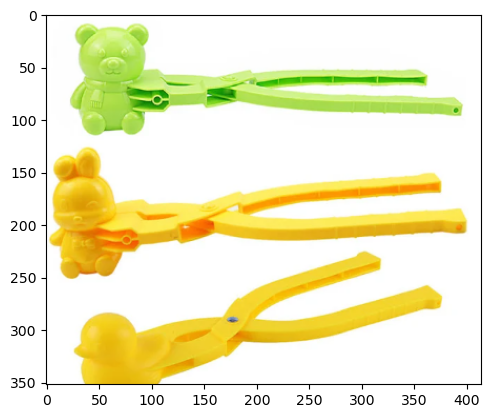

In [10]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #bgr -> rgb 
plt.imshow(img)
plt.show()

### 2. 확대 축소

### 2-1. 비율로 확대 및 축소

In [16]:
big_img = cv2.resize(img, dsize=None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR) 
sml_img = cv2.resize(img, dsize=None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

In [17]:
from matplotlib import pyplot as plt

# 실제 이미지 크기대로 각각 출력해주는 함수 작성

def show_image_in_actual_size(img, title="Image"):
    dpi = plt.rcParams['figure.dpi']
    height, width = img.shape[:2]
    figsize = width / float(dpi), height / float(dpi)

    fig =plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img, aspect= 'auto')
    plt.title(title)
    plt.show

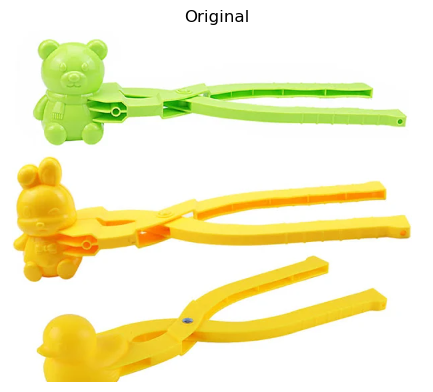

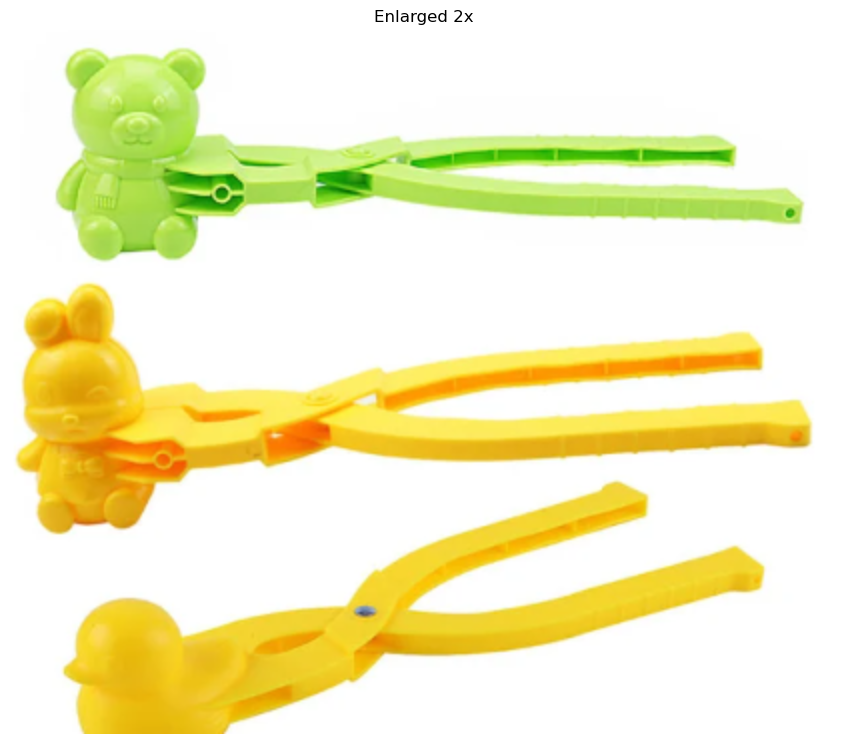

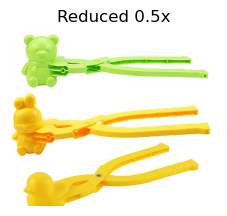

In [18]:
# 원본 이미지 표시
show_image_in_actual_size(img, "Original")

# 2배 확대 이미지 표시
show_image_in_actual_size(big_img, "Enlarged 2x")

# 2배 축소 이미지 표시
show_image_in_actual_size(sml_img, "Reduced 0.5x")

### 2-2 절대크기로 조정

In [30]:
resized_img1 = cv2.resize(img, (50,200), interpolation=cv2.INTER_AREA) 
resized_img2 = cv2.resize(img, (600,300), interpolation=cv2.INTER_LINEAR)

### 데이터 크기를 확인해 볼까요?

In [31]:
print("원본:", img.shape)
print("조정본1 :", resized_img1.shape)
print("조정본2: ", resized_img2.shape)

원본: (352, 414, 3)
조정본1 : (200, 50, 3)
조정본2:  (300, 600, 3)


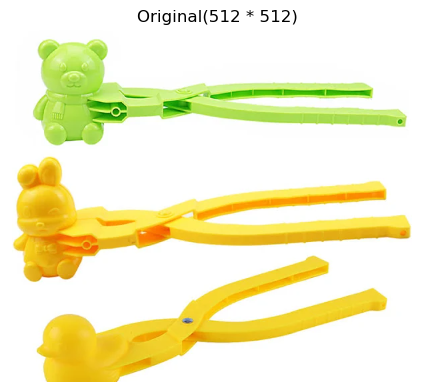

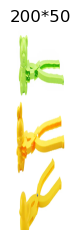

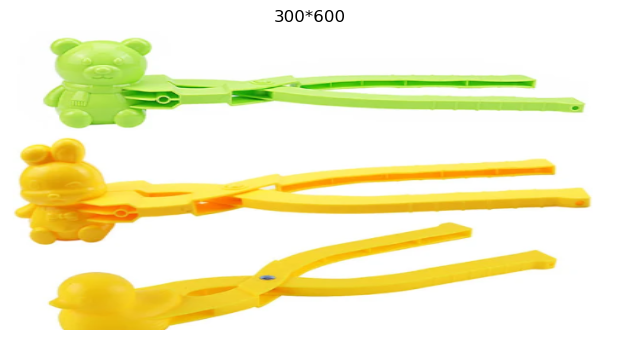

In [32]:
# 원본 이미지 표시
show_image_in_actual_size(img, "Original(512 * 512)")

# 2배 확대 이미지 표시
show_image_in_actual_size(resized_img1, "200*50")

# 2배 축소 이미지 표시
show_image_in_actual_size(resized_img2, "300*600")

### 3. 색공간 변경

In [42]:
#cv2.COLOR_<원본 색 공간명> 

####  그레이스케일로 변환

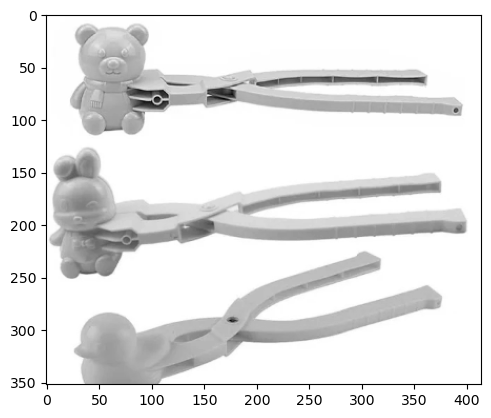

In [36]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

In [38]:
cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).shape # 높이 352, 너비 414 

(352, 414)

In [40]:
img.shape # # 높이 352, 너비 414, 컬러이미지 3

(352, 414, 3)

### 4. 이미지 반전
- 이미지를 좌우, 상하
- 뒤집어도 차원은 같음
- 이미지 학습률이 낮을 때, 이미지 데이터 수를 늘릴 때 주로 사용

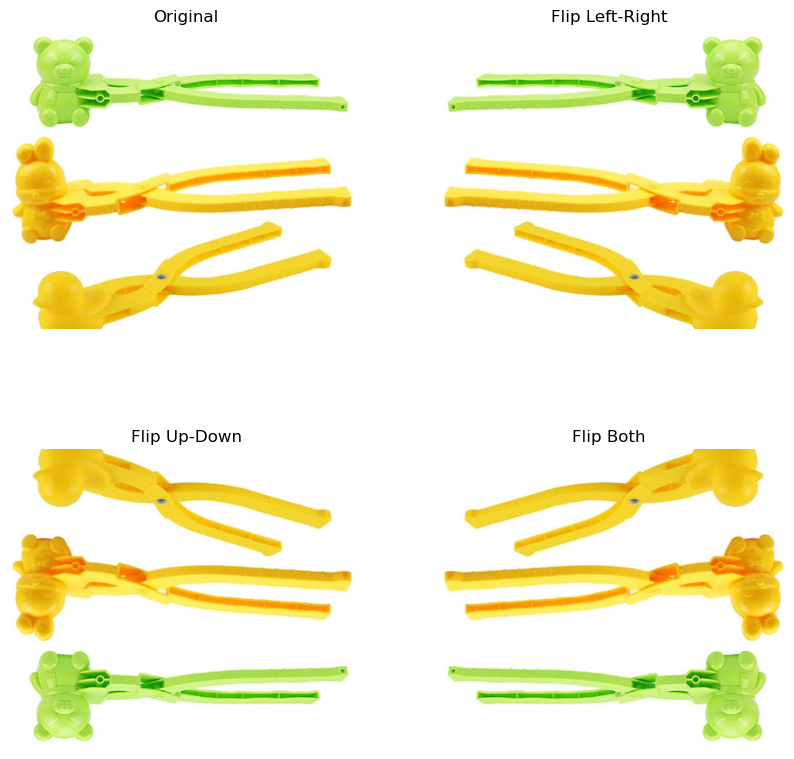

In [51]:
# 좌우 반전
img_flip_lr = cv2.flip(img, 1)
# 상하 반전
img_flip_ud = cv2.flip(img, 0)
# 상하좌우 반전
img_flip_both = cv2.flip(img, -1)

# 2*2 subplot 생성
plt.figure(figsize=(10,10))

# 원본 이미지
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# 좌우 반전 이미지
plt.subplot(2,2,2)
plt.imshow(img_flip_lr)
plt.title('Flip Left-Right')
plt.axis('off')

# 상하 반전 이미지
plt.subplot(2,2,3)
plt.imshow(img_flip_ud)
plt.title('Flip Up-Down')
plt.axis('off')

# 상하좌우 반전 이미지
plt.subplot(2,2,4)
plt.imshow(img_flip_both)
plt.title('Flip Both')
plt.axis('off')

plt.show()


### 5. 변환행렬 생성

In [53]:
rows, cols = img.shape[:2]

In [65]:
# 회전을 위한 변환행렬 생성
M1 = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1) #scale =1 , 검은 부분은 데이터가 없음
M2 = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1.8) #scale =1 , 검은 부분은 데이터가 없음
M3 = cv2.getRotationMatrix2D((cols/2, rows/2), 135, 2) #scale =1.5 , 검은 부분이 사라짐

In [66]:
# 변환 행렬을 사용하여 이미지 회전
rotated_img1 = cv2.warpAffine(img, M1, (cols, rows))
rotated_img2 = cv2.warpAffine(img, M2, (cols, rows))
rotated_img3 = cv2.warpAffine(img, M3, (cols, rows))

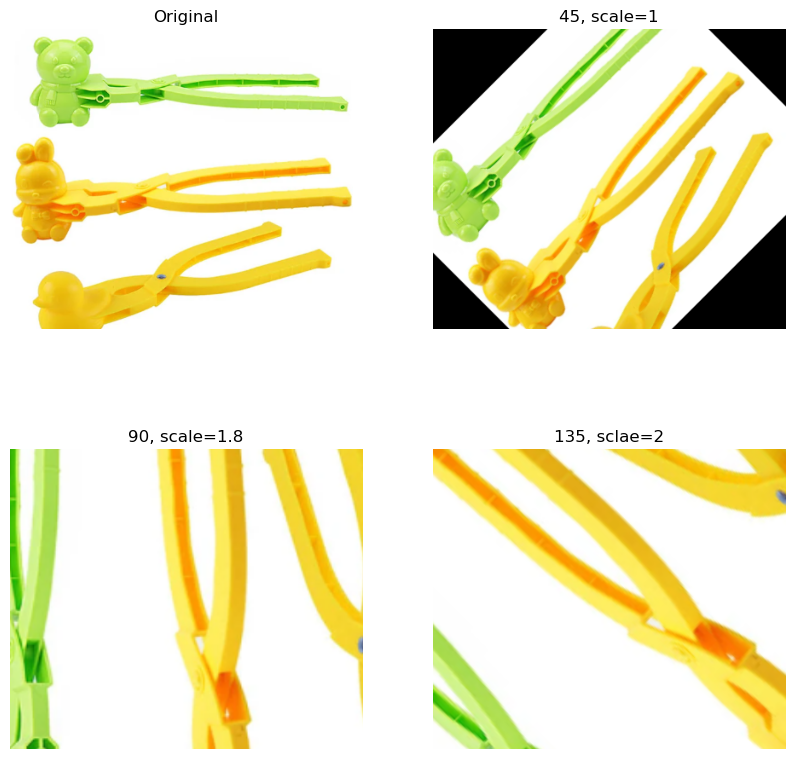

In [67]:
# 이미지 시각화
plt.figure(figsize=(10,10))

# 원본 이미지
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# 좌우 반전 이미지
plt.subplot(2,2,2)
plt.imshow(rotated_img1)
plt.title('45, scale=1')
plt.axis('off')

# 상하 반전 이미지
plt.subplot(2,2,3)
plt.imshow(rotated_img2)
plt.title('90, scale=1.8')
plt.axis('off')

# 상하좌우 반전 이미지
plt.subplot(2,2,4)
plt.imshow(rotated_img3)
plt.title('135, sclae=2')
plt.axis('off')

plt.show()
# 

## 6. 이미지 자르기
- 딥러닝시 ,관심있는 특정 영역만을 잘라봅시다.


In [113]:
crop_img = img[125:250, 0:70].copy() # numpy 슬라이싱과 유사 [세로, 가로]

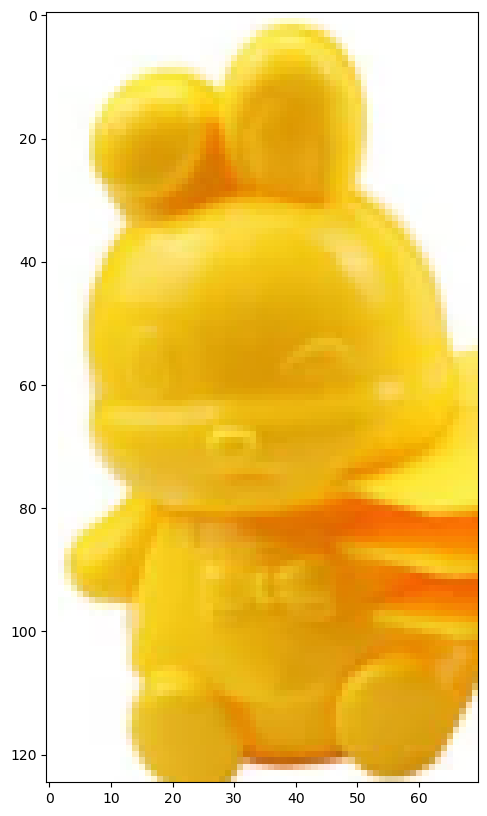

In [114]:
plt.figure(figsize=(10,10))
plt.imshow(crop_img)
plt.show()

### 7. 가장자리 검출 (edge)
- 사람은 개체로 이미지를 인식
- 개체의 최소 단위: 윤곽(선)
- 가장자리 검출은 컴퓨터가 이미지를 인식 할 수 있도록 하는 첫번째 단계, 색깔보다 형체에 집중할 때 주로 사용 (EX: 로봇청소기)
- 가장자리 : 이미지상의 개체의 가장 바깥 둘레를 의미. (=테두리)
- 전경과 배경이 구분되는 지점, 즉 밝기가 큰 폭으로 변하는 지점이 가장자리가 됨.
- 픽셀 밝기 변화율이 높은 경계선을 찾으려면, 가장자리를 찾기 위해 미분, 기울기 계산이 필요함
- 크게 소벨(Sobel), 라플라시안(Laplacian), 캐니(Canny)의 3가지 함수가 존재
- ※ 일반적으로 그레이스케일화된 이미지로 수행한다.

In [165]:
sobel = cv2.Sobel(gray_img, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray_img, cv2.CV_8U, ksize =3, scale=1) 
canny = cv2.Canny(gray_img, 100, 250)

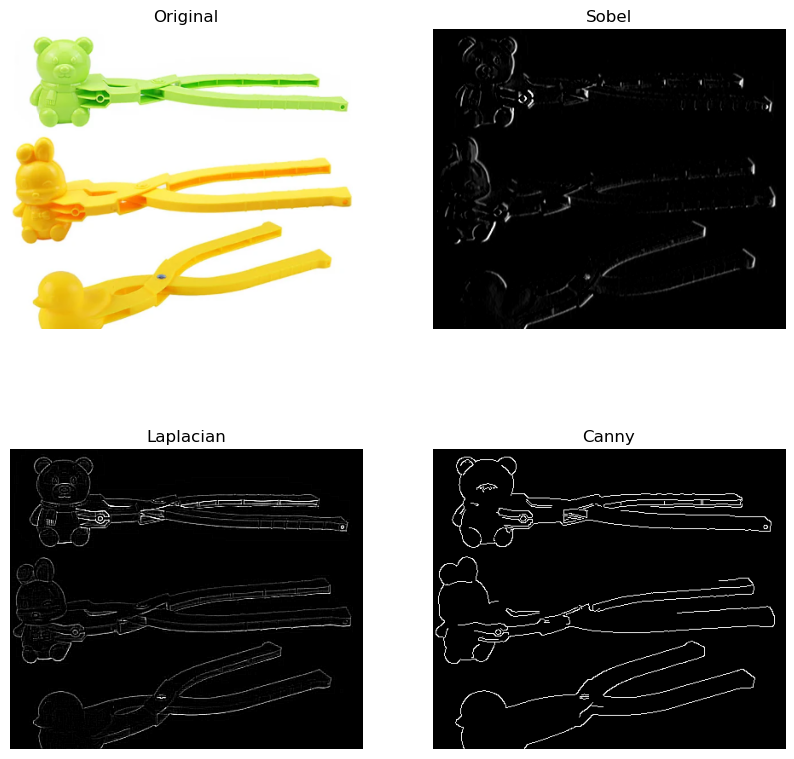

In [166]:
# 이미지 시각화
plt.figure(figsize=(10,10))

# 원본 이미지
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# 좌우 반전 이미지
plt.subplot(2,2,2)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel')
plt.axis('off')

# 상하 반전 이미지
plt.subplot(2,2,3)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

# 상하좌우 반전 이미지
plt.subplot(2,2,4)
plt.imshow(canny, cmap='gray')
plt.title('Canny')
plt.axis('off')

# 이미지 표시
plt.show()

### 8. 이진화
- 0 또는 1로만 된 1비트 이미지를 생성
- 인터넷에서 검은색/흰색으로만 구별하기 적절한 텍스트나 로고 이미지를 업로드 해봅시다.
- 또는 아무 글자나 메모장 또는 워드에 작성한 다음, 캠쳐하여 업로드해 불러와 봅시다.
- cv2.threshold(kor_gray, 200, 255, cv2.THRESH_BINARY) 너무 높은 임계값은 밝은 영역을 흰색으로 처리하지 못하고 모두 검은색으로 처리 됨 

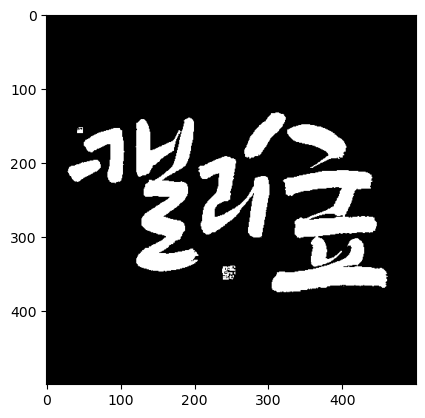

In [213]:
kor = cv2.imread('kor.jpg')
# 그레이스케일화 필요
kor_gray = cv2.cvtColor(kor, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(kor_gray, 200, 255, cv2.THRESH_BINARY) # binary 가 우리가 쓰는 인스턴스, 100이 그냥 들어가기 때문에 ret 은 안 쓰는 인스턴스
binary = cv2.bitwise_not(binary)
plt.imshow(binary,cmap='gray')

### 9. 윤곽선 검출 (countour detection)

#### 윤곽선을 검출하려면, 반드시 이진화 후 진행하여야 합니다.
!! 주의 !! findCountours 함수는 흰색의 물체를 검출합니다.

만약 배경이 흰색이고, 개체가 검은색일 경우, 색 반전을 시켜줘야 합니다. 

In [214]:
binary = cv2.bitwise_not(binary) # 색 반전


이 코드는 이진화된 이미지에서 윤곽선을 찾는 작업을 수행

binary: 윤곽선을 찾을 이진화된 이미지입니다. 일반적으로 흑백 이미지나 이진화된 이미지를 사용합니다.

cv2.RETR_CCOMP: 윤곽선을 찾을 때 사용되는 retrieval mode(검색 모드)입니다. RETR_CCOMP는 윤곽선을 찾은 후에 계층 구조(hierarchical structure)를 구축하는데, 이 계층 구조는 외곽 윤곽선과 내부 윤곽선을 각각 다른 레벨로 취급합니다. 즉, 외곽 윤곽선과 내부 윤곽선 간에 부모-자식 관계를 나타내는 계층 구조를 만듭니다.

cv2.CHAIN_APPROX_NONE: 윤곽선을 찾을 때 사용되는 근사화 방법(approximation method)입니다. CHAIN_APPROX_NONE은 윤곽선의 모든 점을 반환합니다. 즉, 윤곽선을 구성하는 모든 점을 반환하며, 근사화를 하지 않습니다.

함수의 반환 값으로는 contours와 hierarchy가 있습니다.

contours: 찾은 윤곽선들을 나타내는 리스트입니다. 각 윤곽선은 점들의 리스트로 표현됩니다. 따라서 contours 리스트의 각 요소는 윤곽선을 나타내는 배열입니다.

hierarchy: 윤곽선의 계층 구조를 나타내는 numpy 배열입니다. 이 배열은 각 윤곽선의 계층 구조를 나타내며, 각 행은 [next, prev, first_child, parent] 형식으로 윤곽선의 계층 정보를 포함합니다.

### 9-1 최외곽 윤곽선 검출

In [215]:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE) 

In [216]:
# 윤관선과 번호 그리기
for i in range(len(contours)):
    # 윤곽선 그리기
    cv2.drawContours(kor, [contours[i]], 0, (0,0,255),1)
    cv2.putText(kor, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX,0.8, (40,40,112),1)

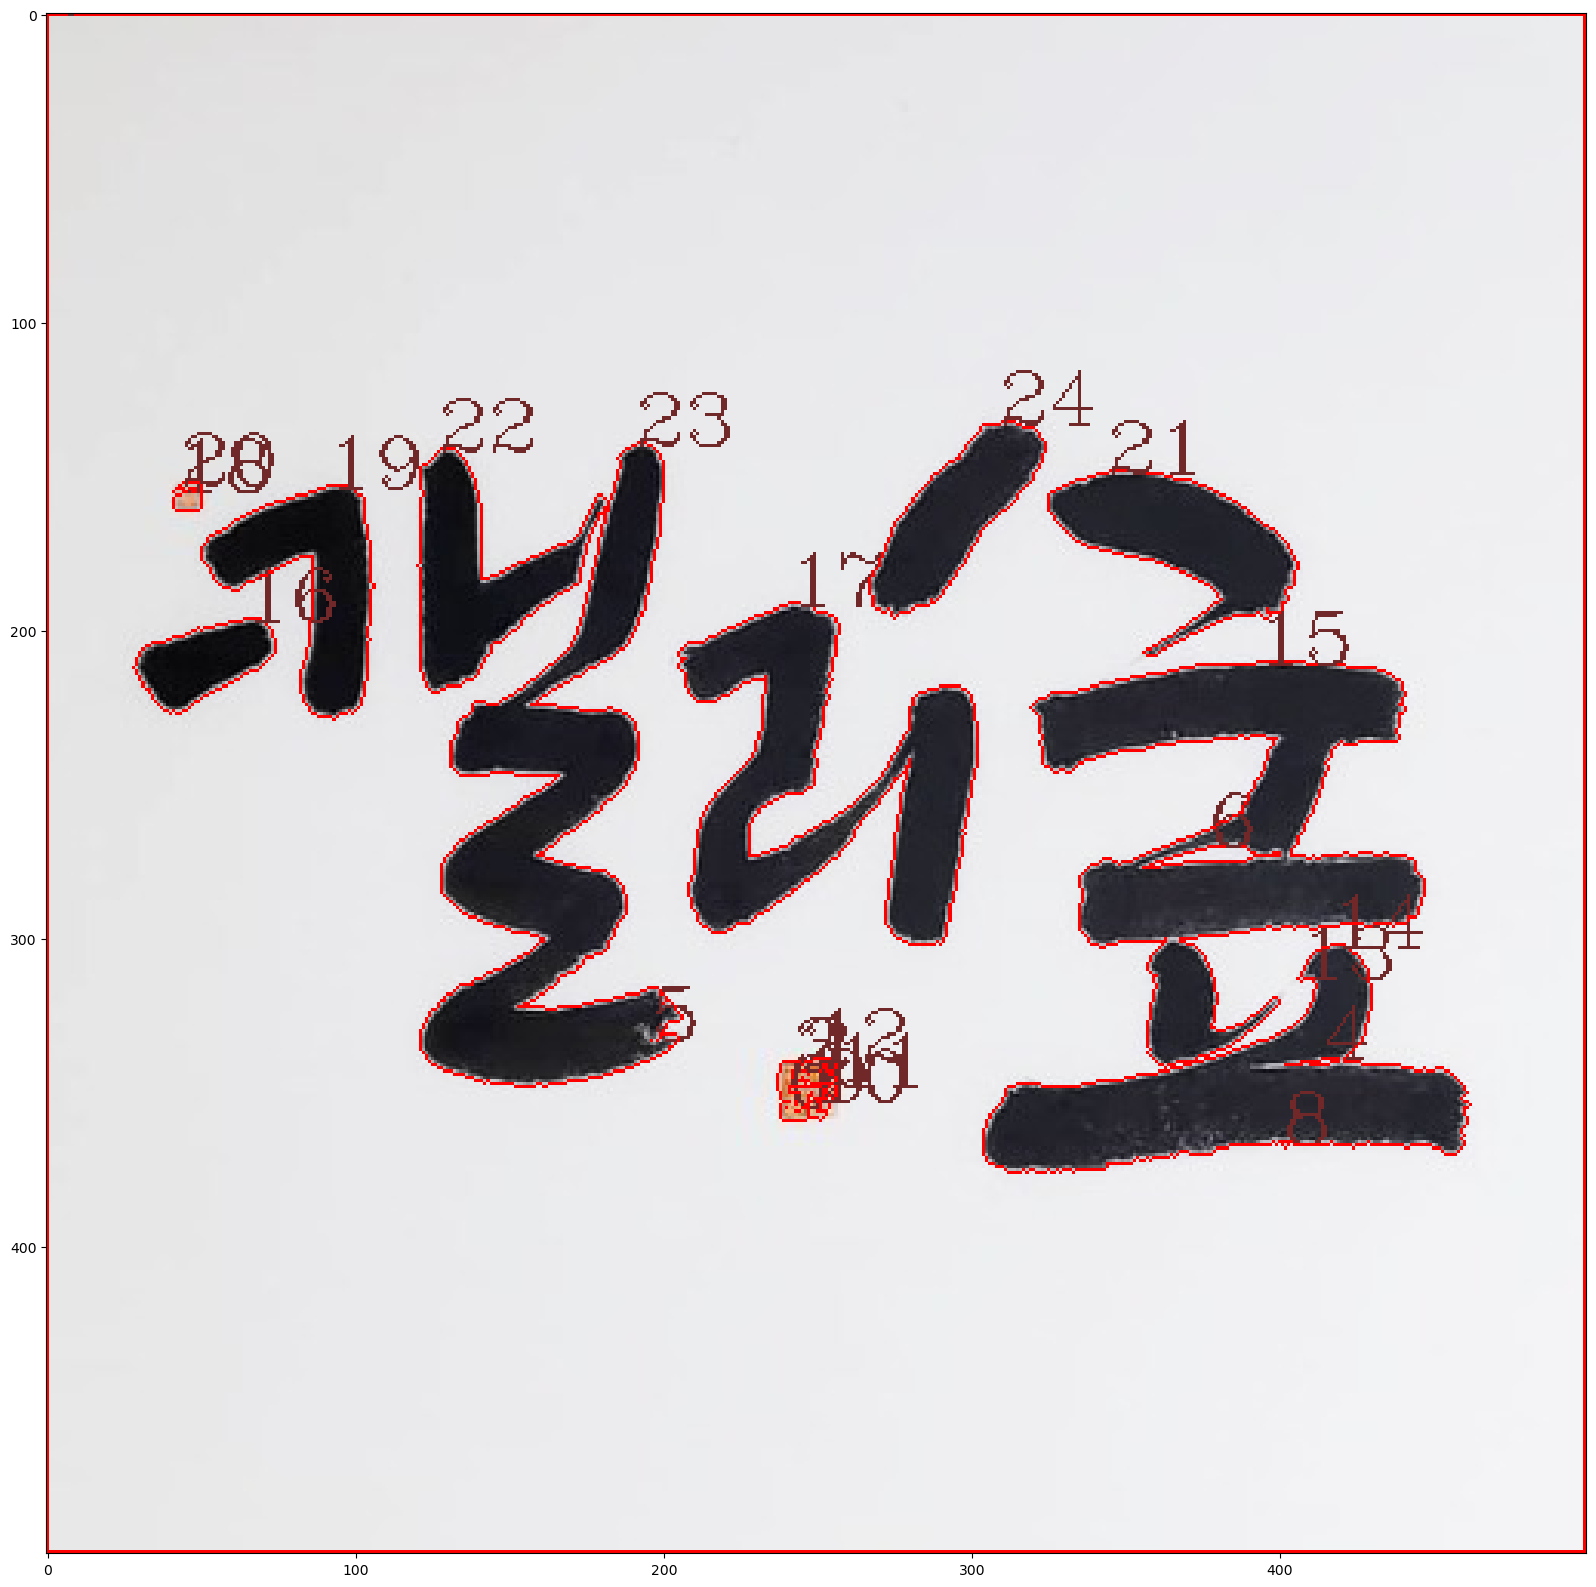

In [217]:
# matplotlib를 이용한 이미지 시각화
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(kor, cv2.COLOR_BGR2RGB))
plt.show()

In [199]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [-1,  6,  8, -1],
        [ 9, -1, -1,  7],
        [10,  8, -1,  7],
        [11,  9, -1,  7],
        [12, 10, -1,  7],
        [13, 11, -1,  7],
        [14, 12, -1,  7],
        [15, 13, -1,  7],
        [16, 14, -1,  7],
        [17, 15, -1,  7],
        [18, 16, -1,  7],
        [19, 17, -1,  7],
        [20, 18, -1,  7],
        [21, 19, -1,  7],
        [22, 20, -1,  7],
        [23, 21, -1,  7],
        [24, 22, -1,  7],
        [-1, 23, -1,  7]]], dtype=int32)

In [219]:
kor.shape

(500, 500, 3)

In [221]:
binary.shape

(500, 500)

In [ ]:
# 첫번 째 숫자는 다음 윤곽선 숫자를 나타냄
# 정수 : 해당 윤곽선 번호
# -1 : 존재하지 않음
